In [2]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize
from operator import itemgetter
import torchvision.transforms

In [3]:
image_directory = '../Task01_BrainTumour/extracted/imagesTr/%i.npy'
label_directory = '../Task01_BrainTumour/extracted/labelsTr/%i.npy'
def get_image_and_target(i):
    return np.load(image_directory % i), np.load(label_directory % i)

In [16]:
def add_values_to_heatmap(from_image, to_image):
    patients = []
    heatmap_image = np.zeros((240, 240))
    for i in range(from_image, to_image):
        patients.append(get_image_and_target(i))
    for i in range(0, to_image-from_image):
        for j in range(4):
            for k in range(155):
                heatmap_image = heatmap_image + patients[i][0][j][k]
    return heatmap_image

Add the images in batches of 100:

In [17]:
heatmap_img = np.zeros((240, 240))
heatmap_img += add_values_to_heatmap(0, 100)

In [18]:
heatmap_img += add_values_to_heatmap(100, 200)

In [19]:
heatmap_img += add_values_to_heatmap(200, 300)

In [20]:
heatmap_img += add_values_to_heatmap(300, 400)

In [21]:
heatmap_img += add_values_to_heatmap(400, 484)

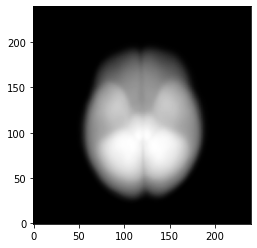

In [23]:
plt.imshow(heatmap_img, cmap="gray", origin="lower")

In [46]:
print(np.where(~np.all(heatmap_img == 0, axis=0)))
print(np.where(~np.all(heatmap_img == 0, axis=1)))

(array([ 38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180,
       181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193,
       194, 195, 196, 197, 198, 199], dtype=int64),)
(array([ 19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,
        3

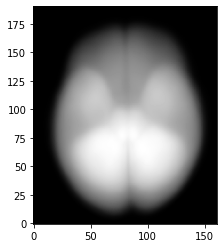

In [48]:
plt.imshow(heatmap_img[19:210, 38:199], cmap="gray", origin="lower")